In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
#import plotly.express as px

In [20]:
url = 'https://www.worldometers.info/coronavirus/'

In [21]:
headers = {'User-Agent':'Mozilla/5.0'}

In [22]:
response = requests.get(url, headers=headers)

In [23]:
response.status_code

200

In [24]:
soup = BeautifulSoup(response.content, 'html.parser')

In [25]:
main_table = soup.find(id='main_table_countries_today')

In [26]:
# type(main_table)

In [27]:
# for thead in main_table.find_all('thead'):
#     for tr in thead.find_all('tr'):
#         with open('testfile.csv','w') as o:
#             for th in tr.find_all('th'):
#                 print(th.text)
#                 w = csv.writer(o)
#                 w.writerow([th.text])


In [28]:
# for thead in main_table.find_all('thead'):
#     for tr in thead.find_all('tr'):
# #         with open('testfile.csv','w') as o:
#         for th in tr.find_all('th'):
#             print(th.text+',',end = '')
            

In [29]:
# with open('testfile.csv','w') as o:
#     w = csv.writer(o)
#     w.writerow([th.text])
#     for r in tr:
#         w.writerow([r])
    

In [30]:
i=0
with open('textfile.txt','w') as r:
    for tbody in main_table.find_all('tbody'):
        for row in tbody.find_all('tr'):
            for cell in row.find_all('td'):
    #                 cell[0]
    #                 print(i)
    #                 print(int(cell)%9)
                cellText = cell.text.strip()
                cellText = cellText.replace(' ','')
                cellText = cellText.replace('.','')
                cellText = cellText.replace(',','')
                cellText = cellText.replace('+','')
#                 print(cellText) 
                r.write(cellText+" ")
            r.write('\n')
    #                 print('\n')
    #                 w = csv.writer(o)
    #                 w.writerow([cellText])

    #                 if(i==0):
    #                     break;
    # #                     print('\n')

        #             with open('testfile.csv','w') as o:
        #                 w = csv.writer(o)
        #                 w.writerow([cell.text]

In [31]:
text_file = "textfile.txt"
csv_file=r"convertedfile.csv"

in_text = csv.reader(open(text_file,"r"), delimiter=' ')
out_csv = csv.writer(open(csv_file,"w"))

out_csv.writerows(in_text)

In [32]:
# with open('convertedfile.csv',newline='') as f:
#     r=csv.reader(f)
#     data = [line for line in r]
    
# with open ('convertedfile.csv','w',newline='') as f:
#     w=csv.writer(f)
#     w.writerow(["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious/Critical","Total Cases/1 Population"])
#     w.writerows(data)

In [33]:
# f = open(csv_file,"w")
# writer = csv.DictWriter(f,fieldnames=["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious/Critical","Total Cases/1M Population"])
# writer.writeheader()
# f.close()

In [34]:
# reader = csv.DictReader(open('convertedfile.csv'))
# writer = csv.DictWriter(open('cleanfile.csv', 'w'), fieldnames=reader.fieldnames)

# for row in reader:
#     if all(col != '' for col in row.values()):
#         continue

#     writer.writerow(row)

In [35]:
df = pd.read_csv(csv_file,encoding='iso-8859-1',index_col=0)


In [36]:
#df.shape

In [37]:
#df

In [38]:
#df.isnull().sum()

In [39]:
#modified_df = df.dropna()

In [40]:
df.rename({"Unnamed: 2":""}, axis="columns", inplace=True)
df.rename({"Unnamed: 4":""}, axis="columns", inplace=True)
df.rename({"Unnamed: 9":""}, axis="columns", inplace=True)

In [41]:
#df

In [42]:
df.to_csv('modified_df.csv')

In [43]:
with open('modified_df.csv',newline='') as f:
    r=csv.reader(f)
    data = [line for line in r]
    
with open ('modified_df.csv','w',newline='') as f:
    w=csv.writer(f)
    w.writerow(["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious/Critical","Total Cases/1 Population"])
    w.writerows(data)

In [44]:
mod_df = pd.read_csv('modified_df.csv',encoding='iso-8859-1',index_col=False)

In [45]:
#mod_df

In [46]:
top10 = mod_df.head(10)

In [47]:
top10

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1 Population
0,China,81093,39.0,3270.0,9.0,72703.0,5120,1749.0,56.0
1,Italy,63927,4789.0,6077.0,601.0,7432.0,50418,3204.0,1057.0
2,USA,41569,8023.0,504.0,85.0,187.0,40878,1040.0,126.0
3,Spain,33089,4321.0,2207.0,435.0,3355.0,27527,2355.0,708.0
4,Germany,29056,4183.0,118.0,24.0,422.0,28516,23.0,347.0
5,Iran,23049,1411.0,1812.0,127.0,8376.0,12861,NaN,274.0
6,France,19856,3838.0,860.0,186.0,2200.0,16796,2082.0,304.0
7,SKorea,8961,64.0,111.0,7.0,3166.0,5684,59.0,175.0
8,Switzerland,8547,1073.0,118.0,20.0,131.0,8298,141.0,988.0
9,UK,6650,967.0,335.0,54.0,135.0,6180,20.0,98.0


In [48]:
bottom10 = mod_df.tail(10)

In [49]:
#bottom10

In [50]:
xCountry=top10["Country"]
yTotalCases=top10["Total Cases"]

In [51]:
plt.rcParams['figure.figsize'] = (14,8)

<BarContainer object of 10 artists>

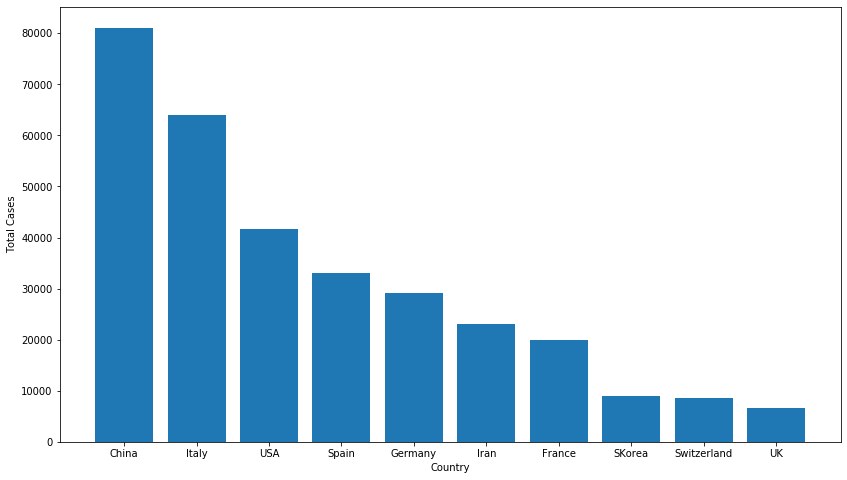

In [52]:
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.bar(xCountry,yTotalCases)
#y_pos = [0,10,20,30,40,50,60,70,80,90]
#plt.bar(y_pos,y)
#plt.xticks(y_pos,x)

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'New Cases')

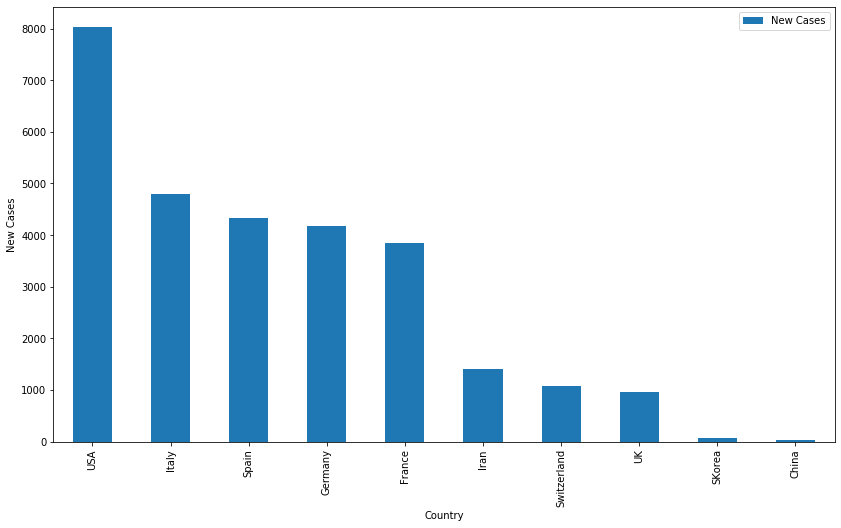

In [53]:
xCountry = top10["Country"]
yNewCases = top10["New Cases"]
top10SortedByNewCases = top10.sort_values(by="New Cases",inplace=True,ascending=False)
top10SortedByNewCasesX = top10.plot(y="New Cases",kind="bar")
_ = top10SortedByNewCasesX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('New Cases')

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Total Deaths')

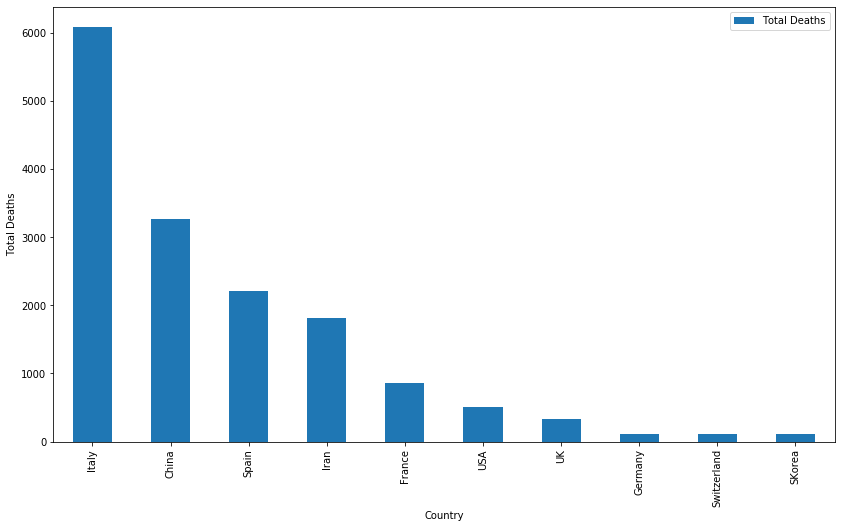

In [54]:
xCountry = top10["Country"]
yTotalDeaths = top10["Total Deaths"]
top10SortedByTotalDeaths = top10.sort_values(by="Total Deaths",inplace=True,ascending=False)
top10SortedByTotalDeathsX = top10.plot(y="Total Deaths",kind="bar")
_ = top10SortedByTotalDeathsX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Total Deaths')

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'New Deaths')

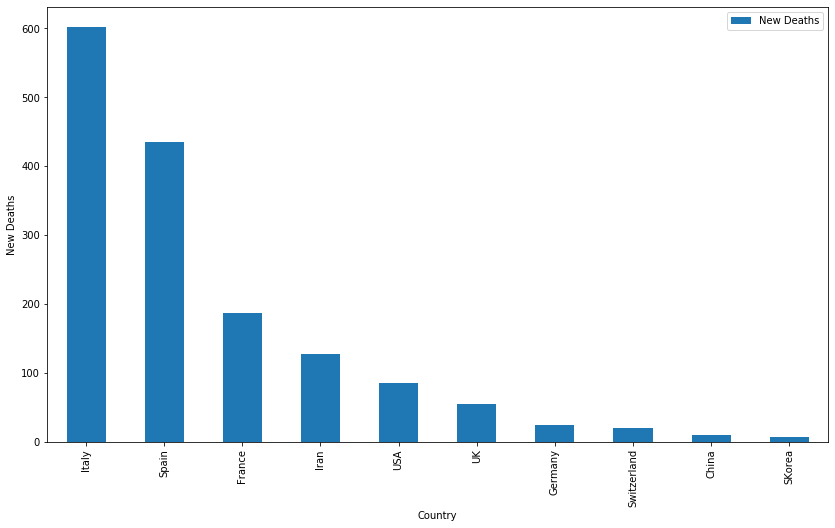

In [55]:
xCountry = top10["Country"]
yNewDeaths = top10["New Deaths"]
top10SortedByNewDeaths = top10.sort_values(by="New Deaths",inplace=True,ascending=False)
top10SortedByNewDeathsX = top10.plot(y="New Deaths",kind="bar")
_ = top10SortedByNewDeathsX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('New Deaths')

In [56]:
# plt.xlabel('Country')
# plt.ylabel('New Cases')
# plt.bar(xCountry,yNewCases)

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Total Recovered')

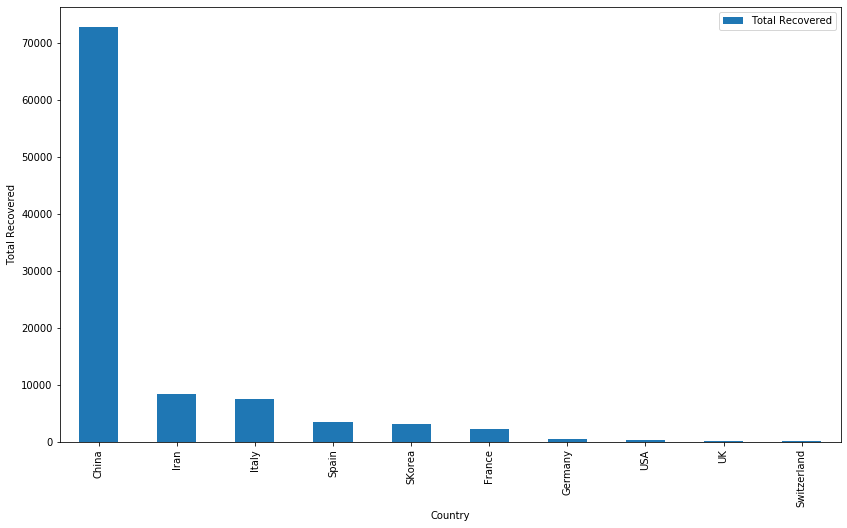

In [57]:
xCountry = top10["Country"]
yTotalRecovered = top10["Total Recovered"]
top10SortedByTotalRecovered = top10.sort_values(by="Total Recovered",inplace=True,ascending=False)
top10SortedByTotalRecoveredX = top10.plot(y="Total Recovered",kind="bar")
_ = top10SortedByTotalRecoveredX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Total Recovered')

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Active Cases')

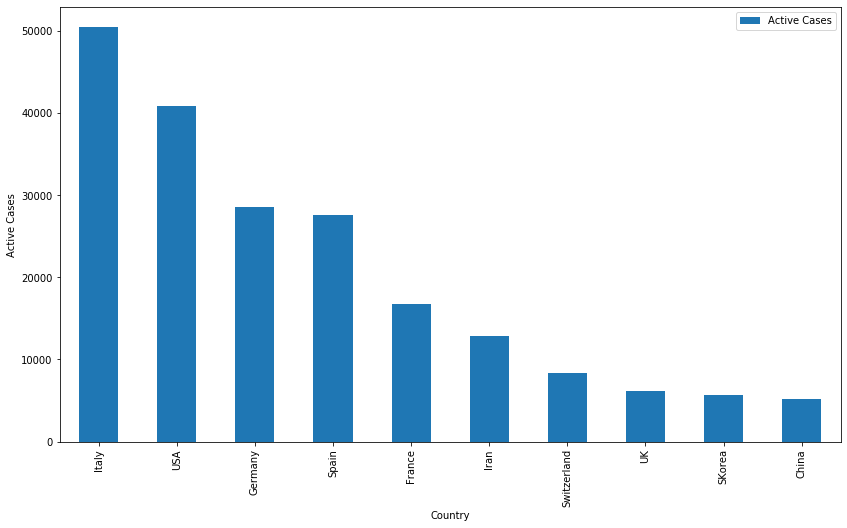

In [58]:
xCountry = top10["Country"]
yActiveCases = top10["Active Cases"]
top10SortedByActiveCases = top10.sort_values(by="Active Cases",inplace=True,ascending=False)
top10SortedByActiveCasesX = top10.plot(y="Active Cases",kind="bar")
_ = top10SortedByActiveCasesX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Active Cases')

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Serious/Critical')

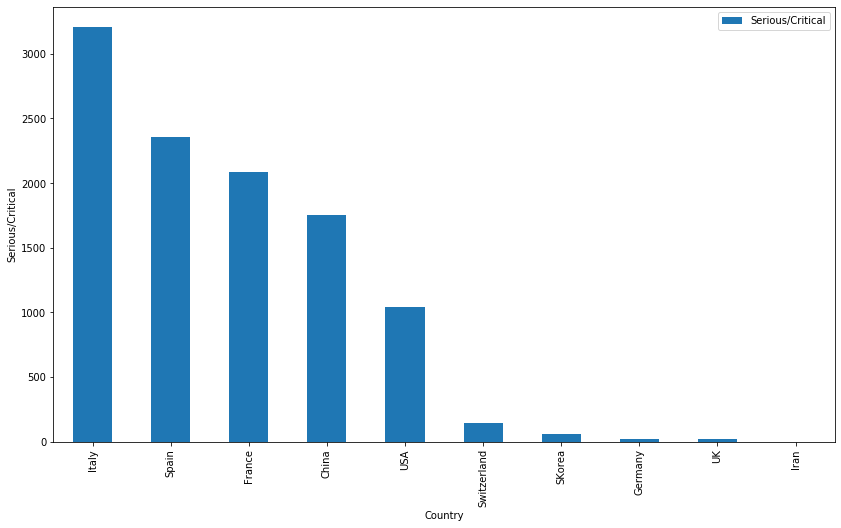

In [59]:
xCountry = top10["Country"]
ySeriousCritical = top10["Serious/Critical"]
top10SortedBySeriousCritical = top10.sort_values(by="Serious/Critical",inplace=True,ascending=False)
top10SortedBySeriousCriticalX = top10.plot(y="Serious/Critical",kind="bar")
_ = top10SortedBySeriousCriticalX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Serious/Critical')

C:\Users\ysj30\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Total Cases/1M Population')

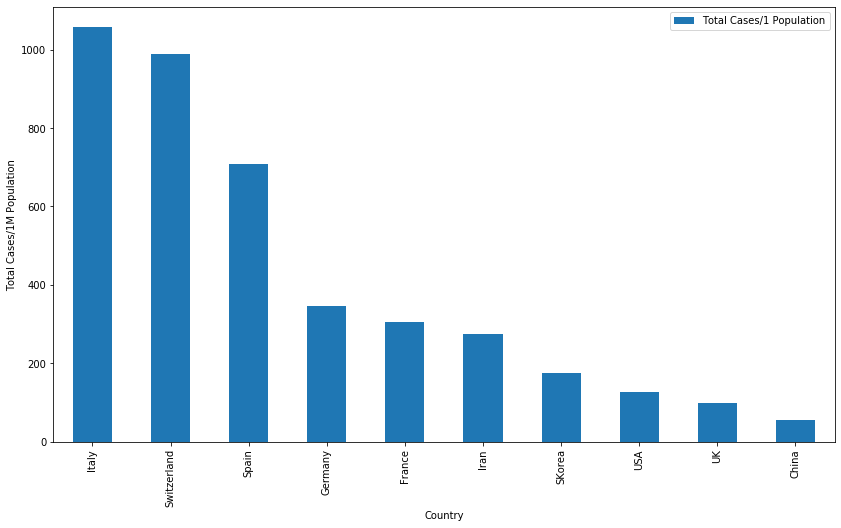

In [60]:
xCountry = top10["Country"]
ySeriousCritical = top10["Total Cases/1 Population"]
top10SortedByTotalCasesPer1M = top10.sort_values(by="Total Cases/1 Population",inplace=True,ascending=False)
top10SortedByTotalCasesPer1MX = top10.plot(y="Total Cases/1 Population",kind="bar")
_ = top10SortedByTotalCasesPer1MX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Total Cases/1M Population')